In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from scipy.stats import pearsonr, spearmanr, kendalltau


import os,sys
sys.path.append(os.path.abspath(os.path.join('..')))

from scripts.utils import *

Reading The News Data

In [38]:
df = pd.read_csv('../data/raw_rating_data/raw_analyst_ratings.csv')
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


Tesla news Data

In [39]:
tesla_df = df[df['stock'] == 'TSLA']
tesla_df.tail()

,Unnamed: 0,headline,url,publisher,date,stock
1257091,1263065,Electrek.Co Tweet: Tesla's head of Europe is out,https://www.benzinga.com/news/19/07/14015998/e...,Charles Gross,2019-07-02 00:00:00,TSLA
1257092,1263066,Tesla's Q2 Delivery Number Could Cause A Big Move,https://www.benzinga.com/analyst-ratings/analy...,Wayne Duggan,2019-07-01 00:00:00,TSLA
1257093,1263067,'Tesla Electric Airplane? Elon Musk sees elect...,https://www.benzinga.com/news/19/07/14011389/t...,Benzinga Newsdesk,2019-07-01 00:00:00,TSLA
1257094,1263068,"UPDATE: JMP Reiterates Outperform, $347 Target...",https://www.benzinga.com/analyst-ratings/analy...,Benzinga_Newsdesk,2019-07-01 00:00:00,TSLA
1257095,1263069,Tesla shares are trading higher after JMP Secu...,https://www.benzinga.com/markets/wiim/19/07/14...,Hal Lindon,2019-07-01 00:00:00,TSLA


### Normalizing Data

Sorted Data

In [40]:
aligned_news_data = tesla_df.sort_values(by='date')
aligned_news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
1257095,1263069,Tesla shares are trading higher after JMP Secu...,https://www.benzinga.com/markets/wiim/19/07/14...,Hal Lindon,2019-07-01 00:00:00,TSLA
1257092,1263066,Tesla's Q2 Delivery Number Could Cause A Big Move,https://www.benzinga.com/analyst-ratings/analy...,Wayne Duggan,2019-07-01 00:00:00,TSLA
1257094,1263068,"UPDATE: JMP Reiterates Outperform, $347 Target...",https://www.benzinga.com/analyst-ratings/analy...,Benzinga_Newsdesk,2019-07-01 00:00:00,TSLA
1257093,1263067,'Tesla Electric Airplane? Elon Musk sees elect...,https://www.benzinga.com/news/19/07/14011389/t...,Benzinga Newsdesk,2019-07-01 00:00:00,TSLA
1257080,1263054,"Tesla, Unum Therapeutics Making Big Moves In T...",https://www.benzinga.com/news/19/07/14022507/t...,Brett Hershman,2019-07-02 00:00:00,TSLA


In [41]:
aligned_news_data.tail()

,Unnamed: 0,headline,url,publisher,date,stock
1255225,1261144,"Tesla's Journey To $1,000 In 2020",https://www.benzinga.com/news/20/06/16222035/t...,Wayne Duggan,2020-06-10 10:15:07-04:00,TSLA
1255224,1261143,GM On Track To Spend $20B On EV And AV Develop...,https://www.benzinga.com/news/20/06/16223414/g...,Benzinga Newsdesk,2020-06-10 11:33:18-04:00,TSLA
1255223,1261142,'Tesla hacker unlocks Performance upgrade and ...,https://www.benzinga.com/news/20/06/16224205/t...,Benzinga Newsdesk,2020-06-10 12:41:58-04:00,TSLA
1255222,1261141,'Tesla factory workplace safety is 5% better t...,https://www.benzinga.com/news/20/06/16225621/t...,Benzinga Newsdesk,2020-06-10 15:08:09-04:00,TSLA
1255221,1261140,Tesla's Stock Closes At All-Time High As Musk ...,https://www.benzinga.com/news/20/06/16225150/t...,Drew Levine,2020-06-10 17:02:47-04:00,TSLA


In [42]:
# # Convert 'DateTime' column to datetime format
# tesla_df_sorted['DateTime'] = pd.to_datetime(tesla_df_sorted['date'])

# # Extract only the date part
# tesla_df_sorted['Date_D'] = tesla_df_sorted['DateTime'].dt.date

# print(tesla_df_sorted)


Reading The Financial Data of Tesla

In [43]:
tesla_data = pd.read_csv('../data/finance_data/TSLA_historical_data.csv')
tesla_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


2019-07-01 - 2020-06-10

Date frame

In [44]:
# Select rows where Date is between '2024-09-02' and '2024-09-03'
start_date = '2019-07-01'
end_date = '2020-06-10'

aligned_finance_data = tesla_data[(tesla_data['Date'] >= start_date) & (tesla_data['Date'] <= end_date)]
aligned_finance_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
2266,2019-07-01,15.347333,15.540000,15.085333,15.144667,15.144667,123201000,0.0,0.0
2267,2019-07-02,15.259333,15.276667,14.814667,14.970000,14.970000,138885000,0.0,0.0
2268,2019-07-03,15.959333,16.104668,15.634000,15.660000,15.660000,213016500,0.0,0.0
2269,2019-07-05,15.638000,15.696667,15.386667,15.540000,15.540000,105985500,0.0,0.0
2270,2019-07-08,15.416000,15.483333,15.244000,15.356000,15.356000,88207500,0.0,0.0


In [45]:
aligned_finance_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
2500,2020-06-04,59.325333,59.716667,57.229332,57.625332,57.625332,133315500,0.0,0.0
2501,2020-06-05,58.522667,59.101334,57.746666,59.043999,59.043999,117178500,0.0,0.0
2502,2020-06-08,61.266666,63.333332,60.610668,63.327999,63.327999,212620500,0.0,0.0
2503,2020-06-09,62.667332,63.629333,61.595333,62.711334,62.711334,170823000,0.0,0.0
2504,2020-06-10,66.125336,68.498665,65.500000,68.336670,68.336670,278451000,0.0,0.0


### Sentimental Analysis

Sentimental Analysis on the aligned News Data

In [46]:
# To Check the polarity on the aligned News Data
aligned_news_data['sentiment_news'] = aligned_news_data['headline'].apply(get_sentiment)
aligned_news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,sentiment_news
1257095,1263069,Tesla shares are trading higher after JMP Secu...,https://www.benzinga.com/markets/wiim/19/07/14...,Hal Lindon,2019-07-01 00:00:00,TSLA,0.250000
1257092,1263066,Tesla's Q2 Delivery Number Could Cause A Big Move,https://www.benzinga.com/analyst-ratings/analy...,Wayne Duggan,2019-07-01 00:00:00,TSLA,0.000000
1257094,1263068,"UPDATE: JMP Reiterates Outperform, $347 Target...",https://www.benzinga.com/analyst-ratings/analy...,Benzinga_Newsdesk,2019-07-01 00:00:00,TSLA,0.066667
1257093,1263067,'Tesla Electric Airplane? Elon Musk sees elect...,https://www.benzinga.com/news/19/07/14011389/t...,Benzinga Newsdesk,2019-07-01 00:00:00,TSLA,0.000000
1257080,1263054,"Tesla, Unum Therapeutics Making Big Moves In T...",https://www.benzinga.com/news/19/07/14022507/t...,Brett Hershman,2019-07-02 00:00:00,TSLA,0.000000


Sentiment Categories for New Data

In [47]:
aligned_news_data['sentiment_category_news'] = aligned_news_data['sentiment_news'].apply(categorize_sentiment)
aligned_news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,sentiment_news,sentiment_category_news
1257095,1263069,Tesla shares are trading higher after JMP Secu...,https://www.benzinga.com/markets/wiim/19/07/14...,Hal Lindon,2019-07-01 00:00:00,TSLA,0.250000,positive
1257092,1263066,Tesla's Q2 Delivery Number Could Cause A Big Move,https://www.benzinga.com/analyst-ratings/analy...,Wayne Duggan,2019-07-01 00:00:00,TSLA,0.000000,neutral
1257094,1263068,"UPDATE: JMP Reiterates Outperform, $347 Target...",https://www.benzinga.com/analyst-ratings/analy...,Benzinga_Newsdesk,2019-07-01 00:00:00,TSLA,0.066667,positive
1257093,1263067,'Tesla Electric Airplane? Elon Musk sees elect...,https://www.benzinga.com/news/19/07/14011389/t...,Benzinga Newsdesk,2019-07-01 00:00:00,TSLA,0.000000,neutral
1257080,1263054,"Tesla, Unum Therapeutics Making Big Moves In T...",https://www.benzinga.com/news/19/07/14022507/t...,Brett Hershman,2019-07-02 00:00:00,TSLA,0.000000,neutral


### Calculate Stock Movements Compute Daily Return

In [48]:

# Convert 'Date' column to datetime format
aligned_finance_data['Date'] = pd.to_datetime(aligned_finance_data['Date'], utc=True, format='mixed')

# Set 'Date' as the index
# aligned_finance_data.set_index('Date', inplace=True)

# Calculate daily stock returns
aligned_finance_data['Daily Return'] = aligned_finance_data['Close'].pct_change() * 100  # Convert to percentage

# Drop NaN values that result from the percentage change calculation
aligned_finance_data.dropna(inplace=True)

aligned_finance_data


C:\Users\Leul\AppData\Local\Temp\ipykernel_12264\3152992306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aligned_finance_data['Date'] = pd.to_datetime(aligned_finance_data['Date'], utc=True, format='mixed')
C:\Users\Leul\AppData\Local\Temp\ipykernel_12264\3152992306.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aligned_finance_data['Daily Return'] = aligned_finance_data['Close'].pct_change() * 100  # Convert to percentage
C:\Users\Leul\AppData\Local\Temp\ipykernel_12264\3152992306.py:11: Settin

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Daily Return
2267,2019-07-02 00:00:00+00:00,15.259333,15.276667,14.814667,14.970000,14.970000,138885000,0.0,0.0,-1.153320
2268,2019-07-03 00:00:00+00:00,15.959333,16.104668,15.634000,15.660000,15.660000,213016500,0.0,0.0,4.609216
2269,2019-07-05 00:00:00+00:00,15.638000,15.696667,15.386667,15.540000,15.540000,105985500,0.0,0.0,-0.766283
2270,2019-07-08 00:00:00+00:00,15.416000,15.483333,15.244000,15.356000,15.356000,88207500,0.0,0.0,-1.184041
2271,2019-07-09 00:00:00+00:00,15.264667,15.400000,15.152000,15.337333,15.337333,92862000,0.0,0.0,-0.121563
...,...,...,...,...,...,...,...,...,...,...
2500,2020-06-04 00:00:00+00:00,59.325333,59.716667,57.229332,57.625332,57.625332,133315500,0.0,0.0,-2.104285
2501,2020-06-05 00:00:00+00:00,58.522667,59.101334,57.746666,59.043999,59.043999,117178500,0.0,0.0,2.461881
2502,2020-06-08 00:00:00+00:00,61.266666,63.333332,60.610668,63.327999,63.327999,212620500,0.0,0.0,7.255607
2503,2020-06-09 00:00:00+00:00,62.667332,63.629333,61.595333,62.711334,62.711334,170823000,0.0,0.0,-0.973763


### Correlation Analysis

Correlation analysis between News and Financial data

Aggregate Sentiments

Daily Sentiment Scores

In [49]:
# Convert 'Date' column to datetime format
# aligned_news_data['date'] = pd.to_datetime(aligned_news_data['date'])
aligned_news_data['date'] = pd.to_datetime(aligned_news_data['date'], utc=True, format='mixed')

# Group by 'date' and calculate average sentiment
daily_sentiment = aligned_news_data.groupby('date')['sentiment_news'].mean().reset_index()
daily_sentiment.rename(columns={'date': 'Date'}, inplace=True)
daily_sentiment


,Date,sentiment_news
0,2019-07-01 00:00:00+00:00,0.079167
1,2019-07-02 00:00:00+00:00,0.102083
2,2019-07-03 00:00:00+00:00,0.058144
3,2019-07-05 00:00:00+00:00,0.166667
4,2019-07-06 00:00:00+00:00,0.500000
...,...,...
288,2020-06-10 14:15:07+00:00,0.000000
289,2020-06-10 15:33:18+00:00,0.000000
290,2020-06-10 16:41:58+00:00,0.000000
291,2020-06-10 19:08:09+00:00,0.183333


Correlation Analysis

Between Daily Sentiment Scores and Stock Returns

In [50]:
daily_sentiment['Date'] = pd.to_datetime(daily_sentiment['Date'])
aligned_finance_data['Date'] = pd.to_datetime(aligned_finance_data['Date'])

# Merge DataFrames on 'Date'
merged_df = pd.merge(daily_sentiment, aligned_finance_data, on='Date')
# Calculate Pearson correlation
pearson_corr, pearson_pval = pearsonr(merged_df['sentiment_news'], merged_df['Daily Return'])

# Calculate Spearman correlation
spearman_corr, spearman_pval = spearmanr(merged_df['sentiment_news'], merged_df['Daily Return'])

# Calculate Kendall's tau correlation
kendall_corr, kendall_pval = kendalltau(merged_df['sentiment_news'], merged_df['Daily Return'])


# Print the results
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_pval}")
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_pval}")
print(f"Kendall's tau correlation: {kendall_corr}, p-value: {kendall_pval}")


Pearson correlation: 0.08428167587706477, p-value: 0.20483805587010986
Spearman correlation: 0.14967416708287154, p-value: 0.023799152050420484
Kendall's tau correlation: 0.09970215230437801, p-value: 0.02564408164089559


C:\Users\Leul\AppData\Local\Temp\ipykernel_12264\2679072338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aligned_finance_data['Date'] = pd.to_datetime(aligned_finance_data['Date'])


In [51]:
merged_df.columns

Index(['Date', 'sentiment_news', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume', 'Dividends', 'Stock Splits', 'Daily Return'],
      dtype='object')

Calculate correlation

In [52]:
# Calculate correlation
correlation = merged_df['sentiment_news'].corr(merged_df['Daily Return'])

print(f'Correlation between Sentiment score and Daily Stock Return: {correlation:.2f}')

Correlation between Sentiment score and Daily Stock Return: 0.08


Visualize the correlation with a scatter plot

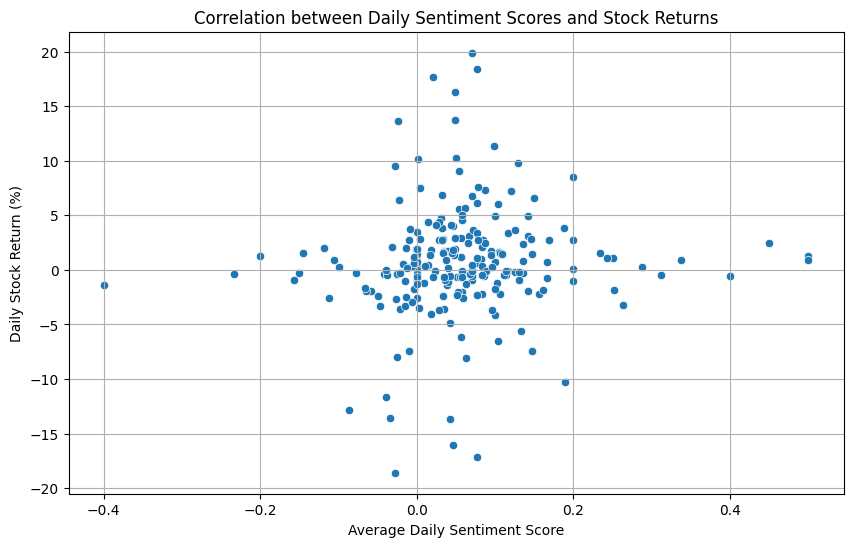

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentiment_news', y='Daily Return', data=merged_df)
plt.title('Correlation between Daily Sentiment Scores and Stock Returns')
plt.xlabel('Average Daily Sentiment Score')
plt.ylabel('Daily Stock Return (%)')
plt.grid(True)
plt.show()


Visualize with a heatmap

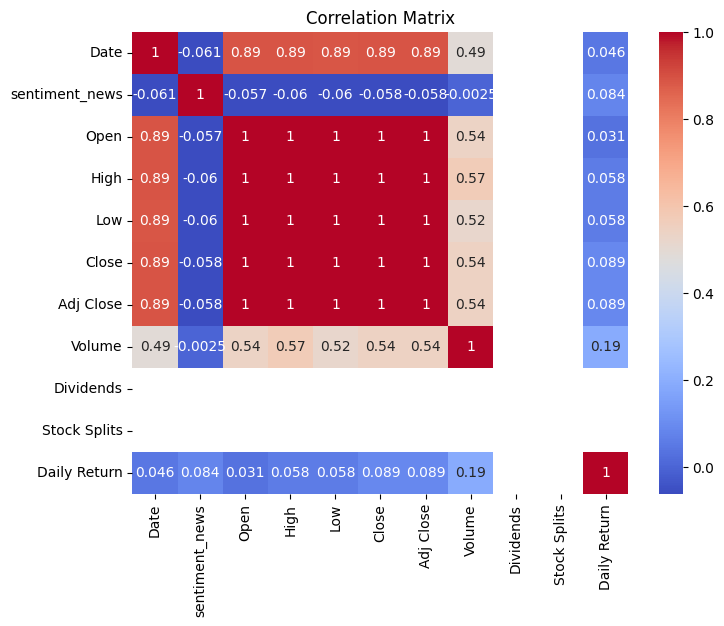

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()